Entrenando el modelo...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.4176 - val_loss: 0.1809
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1277 - val_loss: 0.0518
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0474 - val_loss: 0.0299
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0233 - val_loss: 0.0062
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0056 - val_loss: 0.0030
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0012 - val_loss: 8.8070e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.6526e-04 - val_loss: 7.6434e-04
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.7224e-04 - val_loss: 8.0167e-04
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.8821e-04 - val_loss: 7.5016e-04
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.9681e-04 - val_loss: 6.8755e-04
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━

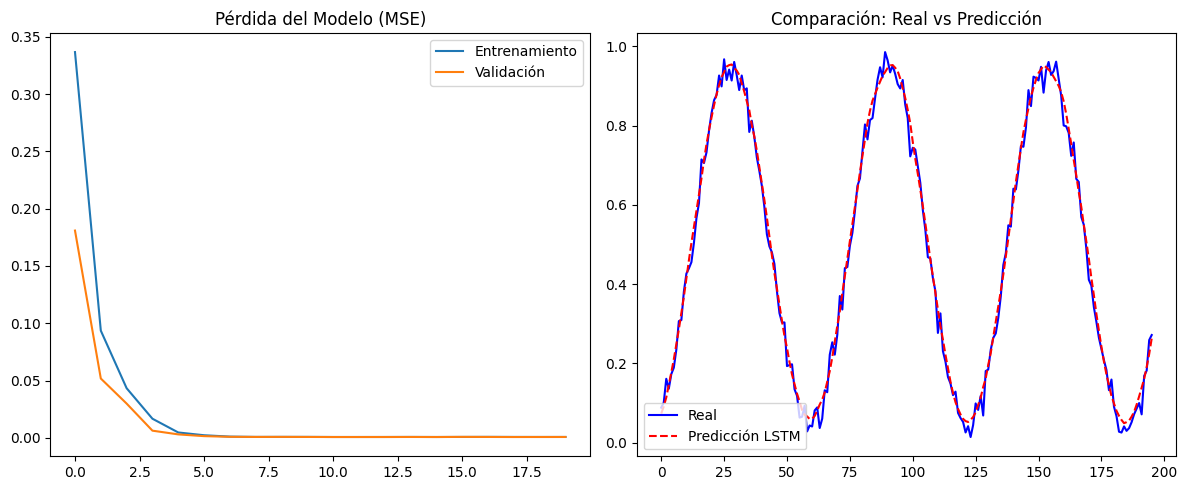

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 1. PREPARACIÓN DE DATOS (DATASET SINTÉTICO)
# Creamos una señal de onda senoidal para predecir valores futuros
t = np.linspace(0, 100, 1000)
data = np.sin(t) + np.random.normal(0, 0.05, 1000) # Seno + un poco de ruido
data = data.reshape(-1, 1) #Cambia la forma de la lista. Pasa de ser una fila larga de números a ser una columna vertical.

# 2. ESCALADO DE DATOS
# Las LSTM son muy sensibles a la escala. Llevamos los valores al rango [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 3. CREAR SECUENCIAS (Ventana de tiempo)
# La LSTM necesita ver "X" pasos atrás para predecir el siguiente
def create_sequences(dataset, window=10):
    X, y = [], []
    for i in range(len(dataset) - window):
        X.append(dataset[i:(i + window), 0])
        y.append(dataset[i + window, 0])
    return np.array(X), np.array(y)

window_size = 20 # Verá 20 pasos atrás para predecir el 21
X, y = create_sequences(data_scaled, window_size)

# 4. DIVISIÓN 80% ENTRENAMIENTO / 20% VALIDACIÓN
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. REDIMENSIONAR (Reshape)
# Keras requiere que la entrada sea: [Muestras, Pasos de tiempo, Características]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 6. CONSTRUCCIÓN DEL MODELO LSTM
model = Sequential([
    # Capa LSTM con 50 neuronas. input_shape indica (pasos_de_tiempo, caracteristicas)
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    # Capa densa de salida (predice 1 solo valor)
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# 7. ENTRENAMIENTO
print("Entrenando el modelo...")
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# 8. PREDICCIÓN Y VISUALIZACIÓN
predictions = model.predict(X_test)

# Graficar resultados
plt.figure(figsize=(12, 5))

# Gráfica de Pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo (MSE)')
plt.legend()

# Gráfica de Predicción vs Real
plt.subplot(1, 2, 2)
plt.plot(y_test, label='Real', color='blue')
plt.plot(predictions, label='Predicción LSTM', color='red', linestyle='--')
plt.title('Comparación: Real vs Predicción')
plt.legend()

plt.tight_layout()
plt.show()